## Road/Rail Freight

Million tonne-kilometres by Year

Data Source: ITF (2020), https://data.oecd.org/transport/freight-transport.htm

Alternative: ["Goods transport", ITF Transport Statistics (database), https://doi.org/10.1787/g2g5557d-en (accessed on 17 May 2020).](https://stats.oecd.org/BrandedView.aspx?oecd_bv_id=trsprt-data-en&doi=g2g5557d-en)

1. Annual data for million tonne-kilometers


In [32]:
import pandas as pd
import missingno as msno

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [61]:
!ls assets

DP_LIVE_17052020151422582.csv
ITF_GOODS_TRANSPORT_17052020153611120.csv
ITF_INV-MTN_DATA_17052020173826254.csv


Load Data

In [17]:
df =pd.read_csv('assets/DP_LIVE_17052020151422582.csv')

## Data Quality

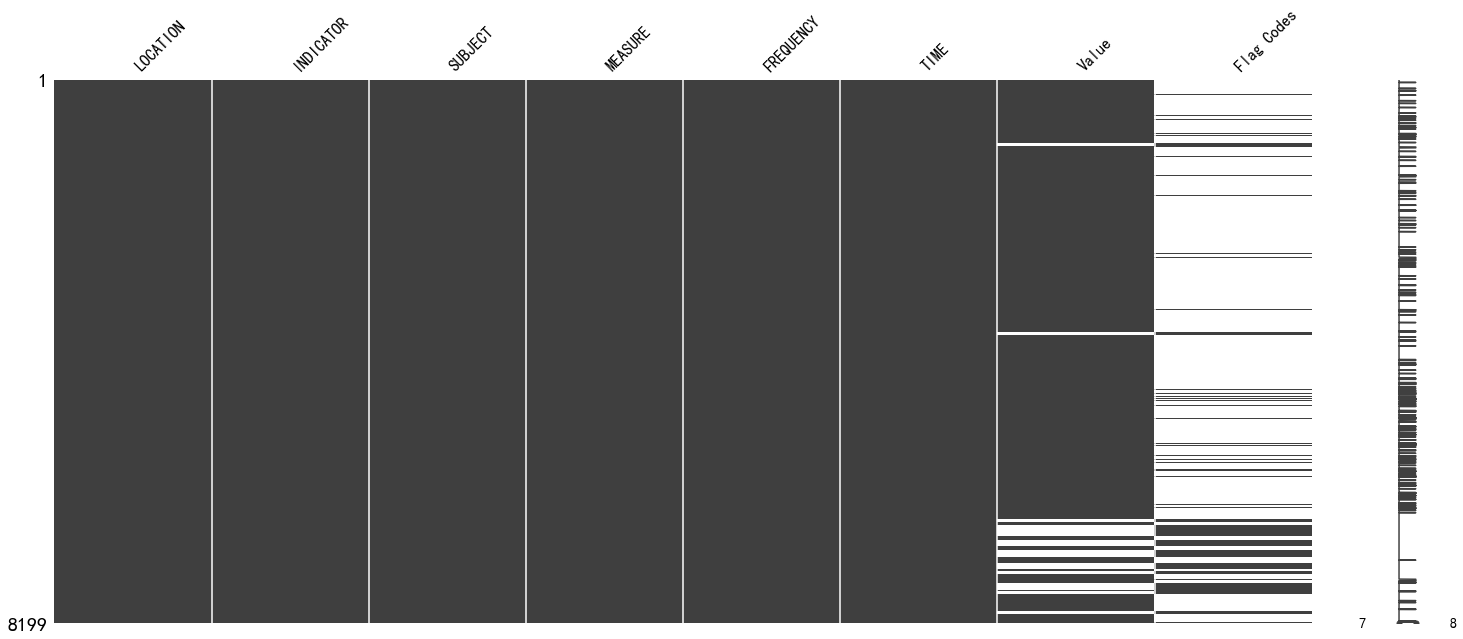

In [27]:
msno.matrix(df)

Flag codes indicates:
```
    1. B: Break
    2. E: Estimated value
    3. P: Provisional value
```

In [18]:
df["Flag Codes"].unique()

array([nan, 'E', 'B', 'P', 'M'], dtype=object)

In [20]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,FREIGHTTRANSP,RAIL,MLN_TONNEKM,A,1970,36006.0,NaN
1,AUS,FREIGHTTRANSP,RAIL,MLN_TONNEKM,A,1971,39704.0,NaN
2,AUS,FREIGHTTRANSP,RAIL,MLN_TONNEKM,A,1972,42661.0,NaN
3,AUS,FREIGHTTRANSP,RAIL,MLN_TONNEKM,A,1973,46711.0,NaN
4,AUS,FREIGHTTRANSP,RAIL,MLN_TONNEKM,A,1974,54075.0,NaN


Check the columns

In [24]:
df.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'ALB', 'ARM', 'AZE', 'BLR', 'BIH', 'BGR',
       'CHN', 'HRV', 'EST', 'GEO', 'IND', 'LVA', 'LIE', 'LTU', 'MKD',
       'MLT', 'MDA', 'ROU', 'RUS', 'SVN', 'UKR', 'SRB', 'MNE', 'ISR',
       'ARG', 'KAZ', 'CHL', 'ARE'], dtype=object)

In [23]:
df.INDICATOR.unique()

array(['FREIGHTTRANSP'], dtype=object)

In [22]:
df.SUBJECT.unique()

array(['RAIL', 'ROAD', 'INLAND', 'COAST'], dtype=object)

In [25]:
df.MEASURE.unique()

array(['MLN_TONNEKM'], dtype=object)

## Road Freight Time Series

LOCATION
POL    1.884590e+07
MEX    1.945221e+07
FRA    1.978077e+07
AUS    2.781989e+07
DEU    3.239641e+07
JPN    3.598497e+07
IND    7.534982e+07
RUS    2.730096e+08
CHN    3.569950e+08
USA    4.441740e+08
Name: Value, dtype: float64

Text(0.5, 0, 'Year')

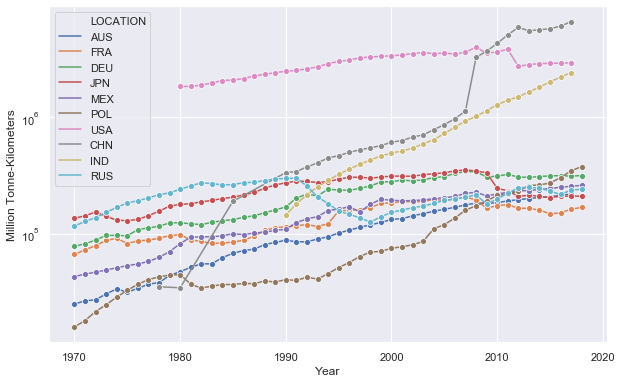

In [60]:
fig, ax = plt.subplots(figsize=(10,6.18))

df_rf = df.loc[
    (
        df.SUBJECT == 'ROAD'
    ) & (
        df.LOCATION.isin(
            df.groupby('LOCATION').sum().Value.sort_values().tail(10).index
        )
    )
]

sns.lineplot(
    x='TIME',
    y='Value',
    data=df_rf,
    hue='LOCATION',
    marker='o'
)

ax.set_yscale('log')
ax.set_ylabel('Million Tonne-Kilometers')
ax.set_xlabel('Year')

## Investments

In [74]:
road_infra_investment_data_path = "assets/ITF_INV-MTN_DATA_17052020174930980.csv"

In [75]:
df_invest = pd.read_csv(road_infra_investment_data_path)

In [76]:
df_invest.head()

,COUNTRY,Country,VARIABLE,Variable,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,1996,1996,ALL,Lek,0,Units,NaN,NaN,2.402000e+09,NaN,NaN
1,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,1997,1997,ALL,Lek,0,Units,NaN,NaN,2.441000e+09,NaN,NaN
2,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,1998,1998,ALL,Lek,0,Units,NaN,NaN,4.765000e+09,NaN,NaN
3,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,1999,1999,ALL,Lek,0,Units,NaN,NaN,1.099700e+10,NaN,NaN
4,ALB,Albania,I-INV-TOT-INLD,Total inland transport infrastructure investment,NAT,National currency,2000,2000,ALL,Lek,0,Units,NaN,NaN,1.464200e+10,NaN,NaN


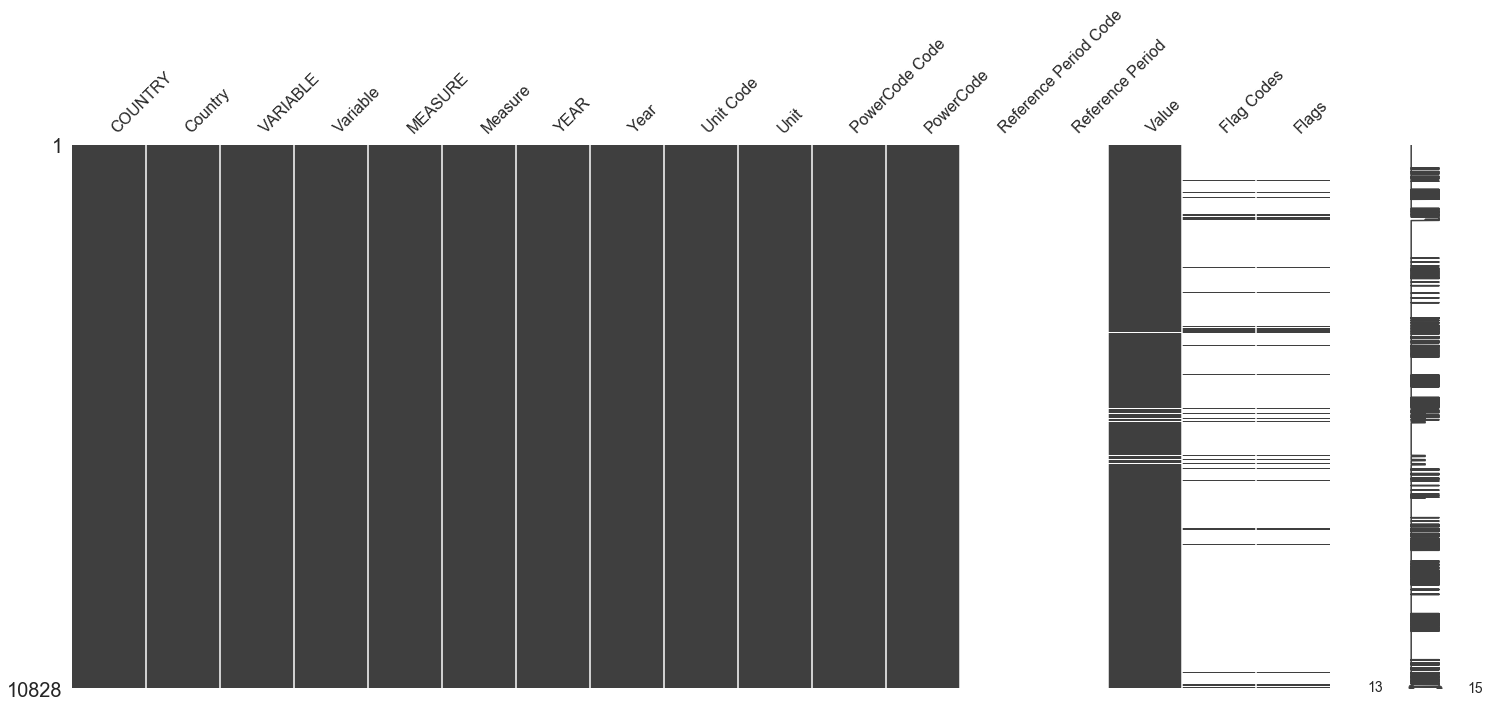

In [77]:
msno.matrix(df_invest)

Check data quality

In [86]:
df_invest.VARIABLE.value_counts()

I-INV-RD          3341
I-INV-TOT-INLD    3042
I-INV-MTN-RD      2713
I-INV-RD-MOTW     1732
Name: VARIABLE, dtype: int64

In [87]:
df_invest.MEASURE.value_counts()

NAT          3644
EUR_CONST    3598
EUR          3586
Name: MEASURE, dtype: int64

In [106]:
df_invest_ri = df_invest.loc[
    (
        df_invest.VARIABLE == 'I-INV-RD'
    ) & (
        df_invest.MEASURE == 'EUR'
    ) & (
        df_invest.COUNTRY.isin(
            df_invest.groupby('COUNTRY').sum().Value.sort_values().tail(10).index
        )
    )
]

Text(0.5, 0, 'Year')

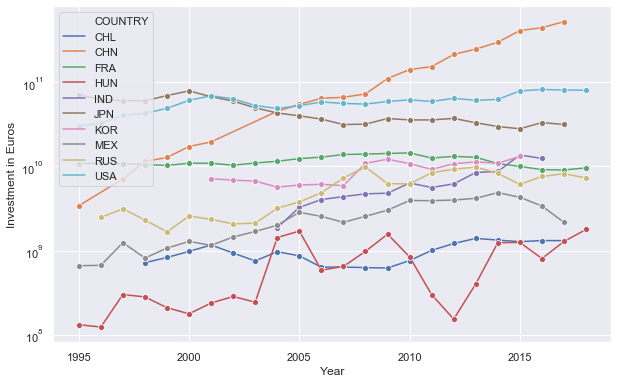

In [107]:
fig, ax = plt.subplots(figsize=(10,6.18))

sns.lineplot(
    x='YEAR',
    y='Value',
    data=df_invest_ri,
    hue='COUNTRY',
    marker='o'
)

ax.set_yscale('log')
ax.set_ylabel('Investment in Euros')
ax.set_xlabel('Year')